## IPL Win Predictor

### Data Parsing and Cleaning

In [1]:
# importing the libraries
import numpy as np
import pandas as pd

In [2]:
# importing the dataset
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(756, 18)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
#calculating total runs inning wise in each match by using group by
total_score_df = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

In [7]:
# removing scores of the seconfd innings as not required
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [8]:
# merging total_score_df in matches dataset
match_df = match.merge(total_score_df[['match_id', 'total_runs']],left_on="id", right_on="match_id")

#### Removing teams which are not playing and chainging names of team whose names are changed

In [9]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
match_df.shape

(756, 20)

In [11]:
# making list of currently playing teams
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders'
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [12]:
# replacing team names for delhi and heydrabad
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')



In [13]:
# removing all other teams which are not playing
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [14]:
match_df.shape

(342, 20)

In [15]:
# removing matches that were affected by rains
match_df = match_df[match_df['dl_applied'] == 0]

In [16]:
# extracting cols which are needed from match_df
match_df = match_df[['match_id', 'city', 'winner', 'total_runs' ]]

In [17]:
# assigning match-dfwith delivery
delivery_df = match_df.merge(delivery, on='match_id')

In [18]:
#for chasing innings data
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [19]:
#Cummilative Sum function
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [20]:
#Runs Left
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [21]:
#Balls Left
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [22]:
#Wickets Left
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [23]:
#Current Run Rate
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [24]:
#Required Run Rate
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [25]:
#Result
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [26]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [27]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [28]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
52631,Delhi Daredevils,Rajasthan Royals,Ahmedabad,144,64,6,201,6.107143,13.5,0


In [29]:
final_df.dropna(inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_20412\2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [30]:
final_df = final_df[final_df['balls_left'] != 0]

In [31]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [32]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
40278,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,82,70,7,130,5.760000,7.028571
6984,Rajasthan Royals,Delhi Daredevils,Jaipur,113,72,8,156,5.375000,9.416667
78073,Chennai Super Kings,Sunrisers Hyderabad,Chennai,105,66,9,179,8.222222,9.545455
24619,Delhi Daredevils,Chennai Super Kings,Chennai,94,96,7,112,4.500000,5.875000
23423,Deccan Chargers,Chennai Super Kings,Nagpur,101,84,8,138,6.166667,7.214286
...,...,...,...,...,...,...,...,...,...
16244,Chennai Super Kings,Mumbai Indians,Port Elizabeth,3,7,7,147,7.646018,2.571429
68844,Rajasthan Royals,Sunrisers Hyderabad,Jaipur,76,56,7,152,7.125000,8.142857
10894,Royal Challengers Bangalore,Chennai Super Kings,Port Elizabeth,105,45,3,179,5.920000,14.000000
25379,Royal Challengers Bangalore,Mumbai Indians,Mumbai,122,73,8,184,7.914894,10.027397


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False, drop='first'),['batting_team','bowling_team', 'city'])
]
,remainder='passthrough')

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [35]:
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LogisticRegression(solver="liblinear"))
])

In [36]:
pipe.fit(X_train, y_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [37]:
y_pred = pipe.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8233454924439813

In [39]:
pipe.predict_proba(X_test)[10]

array([0.06780394, 0.93219606])

In [40]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [41]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [42]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
4390,1,4,0,72.6,27.4
4398,2,8,0,68.3,31.7
4404,3,1,0,74.8,25.2
4410,4,7,1,82.4,17.6
4416,5,12,0,75.0,25.0
4422,6,13,0,64.3,35.7
4428,7,9,0,58.8,41.2
4436,8,15,0,43.1,56.9
4442,9,7,0,40.8,59.2
4449,10,17,0,24.1,75.9


Text(0.5, 1.0, 'Target-178')

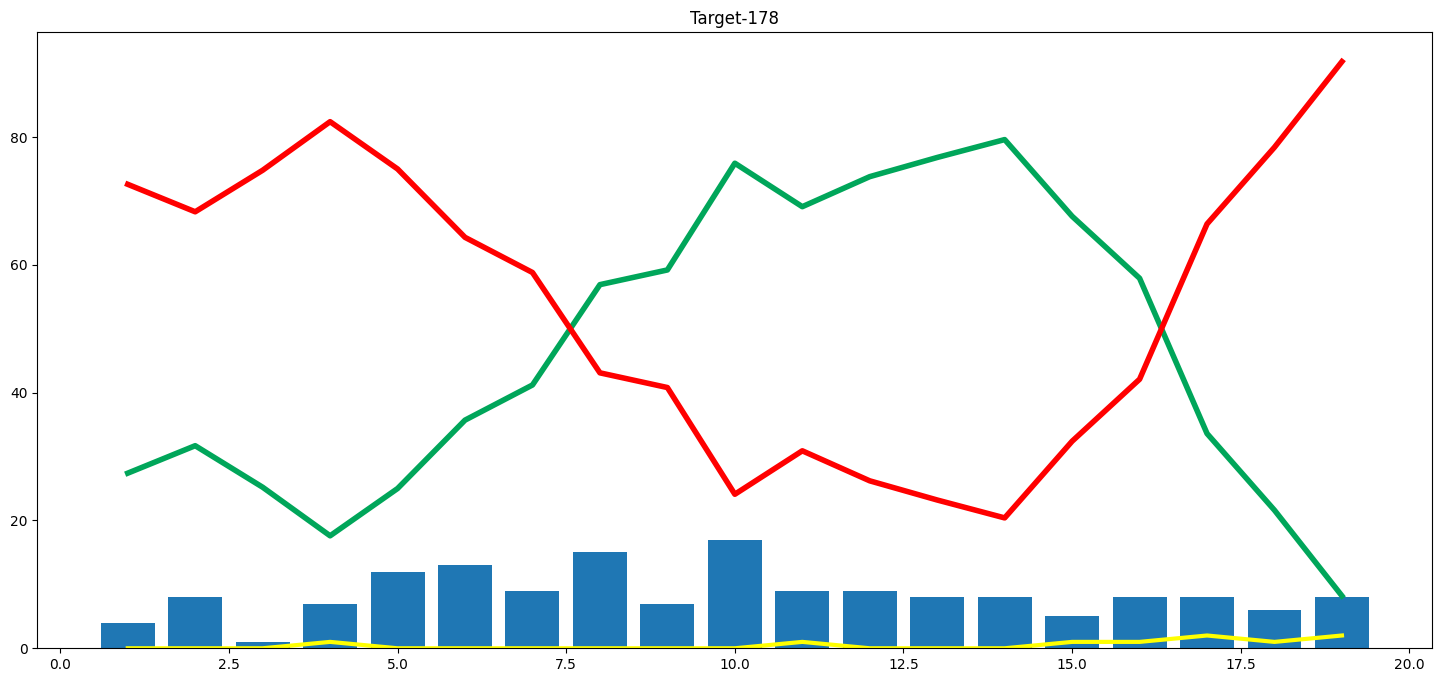

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [44]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Delhi', 'Chennai', 'Jaipur',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'Johannesburg', 'East London', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Visakhapatnam', 'Kolkata',
       'Sharjah', 'Abu Dhabi', nan, 'Ranchi', 'Raipur', 'Pune',
       'Bengaluru'], dtype=object)

In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))